## TOC:
* [Introduct Assignment](#1.1)
* [Second Bullet Header](#1.2)

# Setup System

<a id="1.1"></a> 
## <span style="color:red"> 1. Sumary </span>
***

## <span style="color:red"> 2. Hypothisis </span>
***

- High Weight likely get more positive stepsis
- High Age likely get positive stepsis


## 2.1 Import necessary library

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

## 2.2 Import data

### Import Train dataset

In [45]:
train = pd.read_csv("Paitients_Files_Train.csv")

In [46]:
train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### Import Test dataset

In [47]:
test = pd.read_csv("Paitients_Files_Test.csv")

In [48]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


## 2.3 Drop column ID and Insurance

In [49]:
features = ["PRG","PL","PR","SK","TS","M11","BD2","Age"]

## Rename Column Sepssis to Sepsis

In [50]:
#rename
train.rename(columns={"Sepssis": "Sepsis"}, inplace=True)
test.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

## Change Sepsis to 0 (negative) and 1 (positive)

In [51]:
train.loc[train['Sepsis'].isin(['Positive']), 'Sepsis'] = '1'
train.loc[train['Sepsis'].isin(['Negative']), 'Sepsis'] = '0'
train['Sepsis'] = train['Sepsis'].astype('int')

### Splitting dataset into X and Y

In [52]:
X = train[features]
y = train["Sepsis"]



## Check data of X

In [53]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [54]:
## Check data of Y

In [55]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Sepsis, dtype: int32

# 3. Check corelation for dropping
***

In [56]:
corelation = train.corr()

<AxesSubplot:>

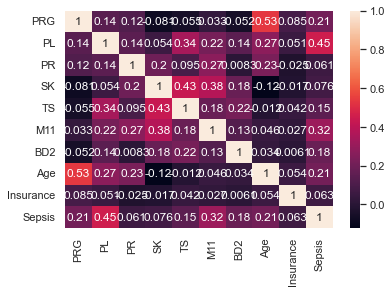

In [57]:
sns.heatmap(corelation, xticklabels = corelation.columns , yticklabels=corelation.columns,annot=True)

C:\Users\William\AppData\Local\Temp/ipykernel_9552/4104708637.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(train.corr(), dtype=np.bool)


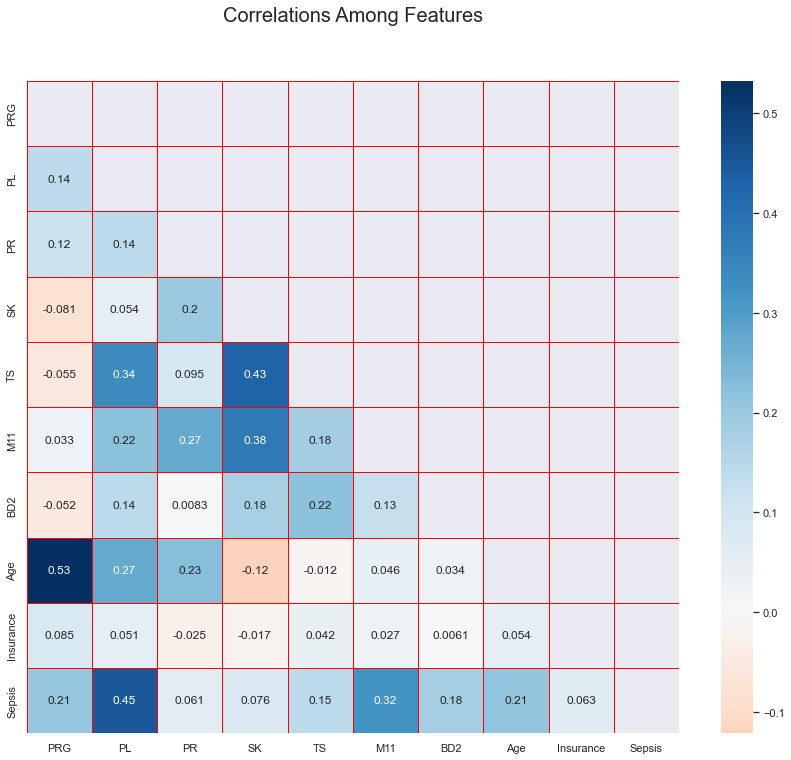

In [58]:
import matplotlib.style as style
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('darkgrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='red',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

## <span style="color:blue"> Comment : </span>
 All corelation is under 50% so all data is fine
 
#### Positive Correlation Features:
- PL and Sepsis: 

#### Negative Correlation Features:
- No negative features



## 3.1 Histogram

<Figure size 432x288 with 0 Axes>

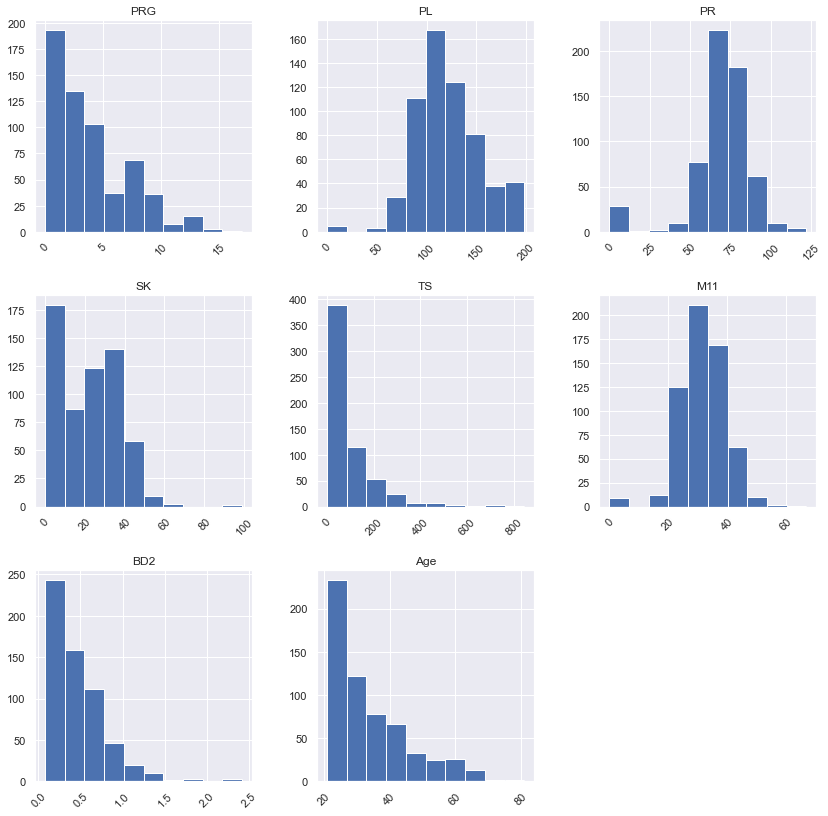

In [59]:
plt.figure()
X.hist(figsize=(14,14), xrot=45)
plt.show()

## <span style="color:blue"> Comment: </span>
PRG ,SK ,TS ,BD2 have the same distribute
PL , PR ,M11 have the same distribution

## 3.2 Statistic of dataset

In [60]:
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144,0.347245
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447,0.476492
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


In [84]:
sepsis_summary = train.groupby("Insurance")
sepsis_summary.mean().reset_index()

,Insurance,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,0,3.404255,118.957447,69.457447,20.973404,72.303191,32.097606,0.478138,32.340426,0.303191
1,1,4.017032,122.097324,68.401460,20.374696,82.734793,32.527372,0.482582,33.725061,0.367397


## <span style="color:blue">  Comment: </span>
<li>This train data set has 601 raw and 9 columns.</li>
<li>only 34% patient got positive.</li>


# <span style="color:red">  4. Data processing </span>
***

In [87]:


print (train.info())
print ("*"*40)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    float64
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepsis     599 non-null    int32  
dtypes: float64(3), int32(1), int64(6), object(1)
memory usage: 49.3+ KB
None
****************************************


<li>We may dont have missing values in our features.</Li>

### M11 filter Groupby

In [61]:
# Filter m11 using groupby
train.loc[(train["M11"] == 0), 'M11'] = np.nan
train['M11'] = train.groupby('Age')['M11'].apply(lambda x: x.fillna(x.median()))

### PL

In [62]:
# Filter pl using groupby
train.loc[(train["PL"] == 0), 'PL'] = np.nan
train['PL'] = train.groupby('Age')['PL'].apply(lambda x: x.fillna(x.median()))

# <span style="color:red"> 5. EDA </span>
***
Before we dive into finding relations between independent variables and our dependent variable(Sepsis), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**
- PRG: High will get sepsis
- M11  : Obese will likely get sepsis
- AGE : old is likely get sepsis than young


## Percent of people having sepsis

<Figure size 1440x576 with 0 Axes>

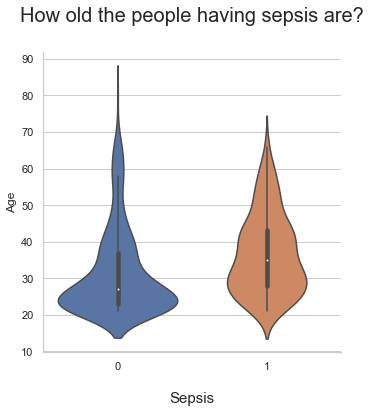

In [63]:
fig = plt.figure(figsize=(20,8))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='Age',
            kind="violin", data=train)
plt.title('How old the people having sepsis are?', fontsize = 20, pad = 30)
plt.ylabel("Age")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);



## <span style="color:blue">  Comment: </span>
Observe from the plot , patients get sepsis mostly more than 30
***

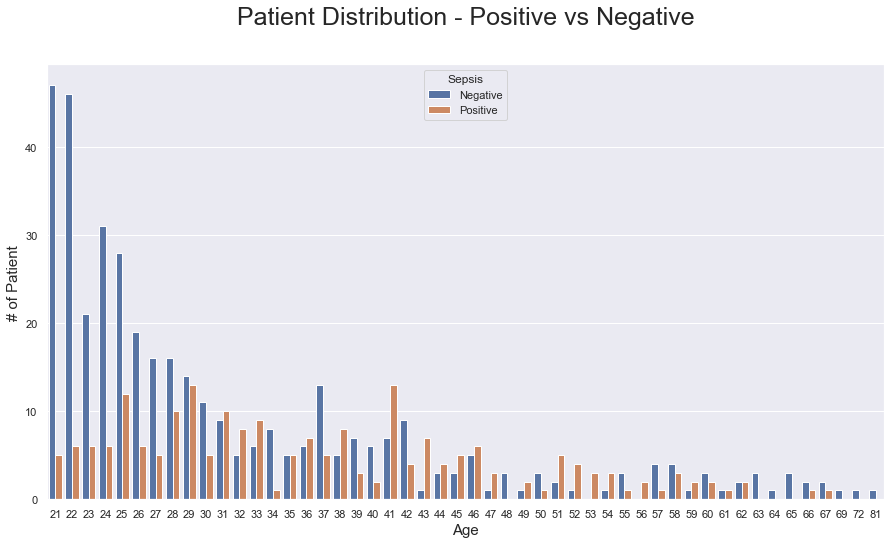

In [88]:
pal = {1:"blue", 0:"red"}
sns.set(style="darkgrid")
plt.subplots(figsize = (15,8))
ax = sns.countplot(x = "Age", 
                   hue="Sepsis",
                   data = train, 

)

## Fixing title, xlabel and ylabel
plt.title("Patient Distribution - Positive vs Negative", fontsize = 25, pad=40)
plt.xlabel("Age", fontsize = 15);
plt.ylabel("# of Patient", fontsize = 15)

## Fixing xticks
#labels = ['Female', 'Male']
#plt.xticks(sorted(train.Sex.unique()), labels)

## Fixing legends
leg = ax.get_legend()
leg.set_title("Sepsis")
legs = leg.texts
legs[0].set_text("Negative")
legs[1].set_text("Positive")
plt.show()

## <span style="color:blue"> Comment: </span>
Begin from 31 the positive tends to dominance negative which means people > 30 get sepsis more than young people
***

## Weight vs Sepsis

<Figure size 2880x2160 with 0 Axes>

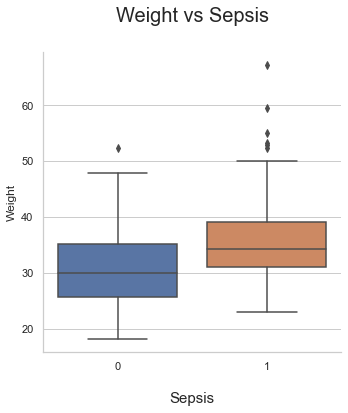

In [65]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='M11',
            kind="box", data=train)
plt.title('Weight vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("Weight")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

## <span style="color:blue"> Comment: </span>
People are obese likely get sepsis
***

<Figure size 2880x2160 with 0 Axes>

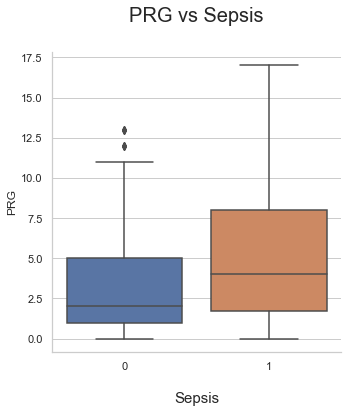

In [66]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='PRG',
            kind="box", data=train)
plt.title('PRG vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("PRG")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

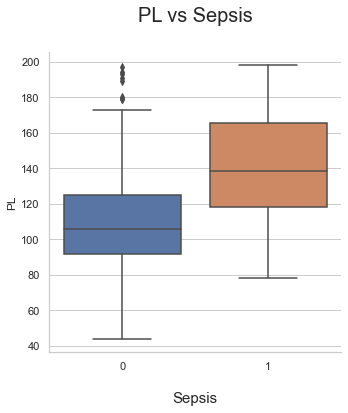

In [67]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='PL',
            kind="box", data=train)
plt.title('PL vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("PL")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

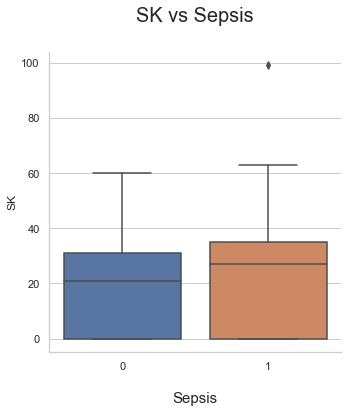

In [68]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='SK',
            kind="box", data=train)
plt.title('SK vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("SK")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

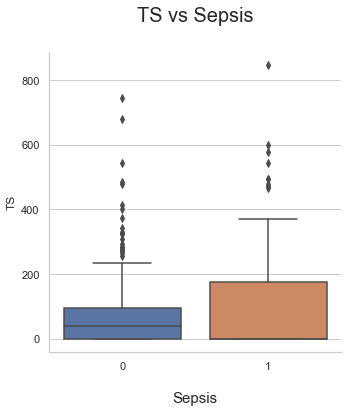

In [69]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='TS',
            kind="box", data=train)
plt.title('TS vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("TS")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

<Figure size 2880x2160 with 0 Axes>

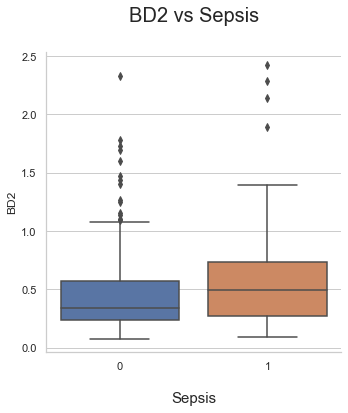

In [70]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='BD2',
            kind="box", data=train)
plt.title('BD2 vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("BD2")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

# <span style="color:red"> 5. Traning Machine Learning Model </span>
***

## 5.1 Pre-Modeling Tasks

In [71]:
from sklearn.model_selection import train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y , train_size = 0.8 , test_size = 0.2 , random_state=0)

In [72]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(
    penalty="l1",
    solver="liblinear",
    tol=1e-6,
    max_iter=int(1e6),
    warm_start=True,
    intercept_scaling=10000.0,
)


In [73]:
lr_model.fit(X_train,y_train)

LogisticRegression(intercept_scaling=10000.0, max_iter=1000000, penalty='l1',
                   solver='liblinear', tol=1e-06, warm_start=True)

In [74]:
print('Test Accuracy:',lr_model.score(X_test,y_test))
print('Train Accuracy:',lr_model.score(X_train,y_train))

Test Accuracy: 0.7833333333333333
Train Accuracy: 0.7828810020876826


In [75]:
y_preds = lr_model.predict(X_test)

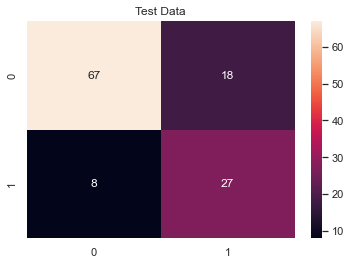

In [76]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
test = confusion_matrix(y_preds,y_test)
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

## Decision Trees 

In [77]:
from sklearn import tree
# old method
# decision_tree = tree.DecisionTreeClassifier(splitter='best',
#                                        max_depth=6 ,criterion="gini")
decision_tree = tree.DecisionTreeClassifier(splitter='random',
                                       max_depth=6 ,criterion="entropy")
decision_tree = decision_tree.fit(X_train, y_train)

In [78]:
print('Test Accuracy:',decision_tree.score(X_test,y_test))
print('Train Accuracy:',decision_tree.score(X_train,y_train))

Test Accuracy: 0.7
Train Accuracy: 0.8016701461377871


In [79]:
y_preds = decision_tree.predict(X_test)

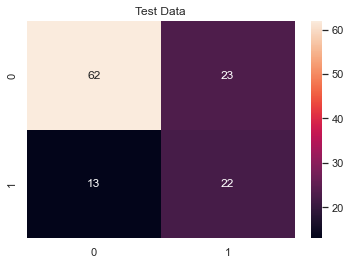

In [80]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
test = confusion_matrix(y_preds,y_test)
plt.title('Test Data')
sns.heatmap(data=test,annot=True,fmt='g')
plt.show()

Dự báo bệnh bị nhưng thực ko : 11
Dự báo ko bị nhung bị :34

In [81]:
from sklearn.metrics import f1_score, accuracy_score
lMaxIter = [2,5,10,50,100,250,1000,10000,100000,1000000,10000000]
lF1Score = []
lAccuracyScore = []

In [82]:
for maxIter in lMaxIter:
    currLogRegNba = LogisticRegression(
        penalty="l1",
        solver="liblinear",
        tol=1e-6,
        max_iter=maxIter,
        warm_start=True,
        intercept_scaling=10000.0,
    )
    y_preds = lr_model.predict(X_test)
    y_pred_train = lr_model.predict(X_train)
    currLogRegNba.fit(X_train,y_train)
    currPred = currLogRegNba.predict(X_test)
    lF1Score.append(currLogRegNba.score(X_test,y_test))
    lAccuracyScore.append(currLogRegNba.score(X_train,y_train))

C:\Users\William\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\William\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\William\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\William\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


[0.65, 0.7583333333333333, 0.7666666666666667, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333]
[0.6993736951983298, 0.7703549060542797, 0.7745302713987474, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826, 0.7828810020876826]


ValueError: The number of FixedLocator locations (8), usually from a call to set_ticks, does not match the number of ticklabels (11).

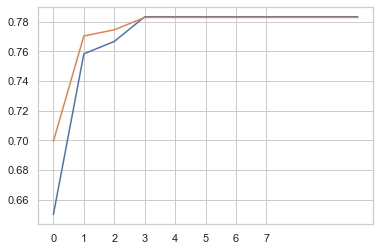

In [83]:
print(lF1Score)
print(lAccuracyScore)
plt.figure()
plt.plot(lF1Score)
plt.plot(lAccuracyScore)
plt.xticks(range(8),lMaxIter)
plt.show()